## Convective rain and snow time series:

## ICON simulations

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing utility dictionaries
import sys
sys.path.append('/pf/b/b381185/behrooz/Hackathon_b/nawdex-hackathon/shared')

# simulations dictionary
import dict_nawdexsims
simdict = dict_nawdexsims.simdictionary()

# dictionary for the days to be analyzed
anadaysdict = dict_nawdexsims.anadaysdictionary()

# dictionary for colors
colordict = dict_nawdexsims.colordictionary()

# center_difference gradient
def grad(var,delta,ax):
    df = np.gradient(var,delta,axis=ax)
    return(df)

## Load domain mean_open ocean precipitation fields

In [80]:
sim_set_1 = []

for sim in list(simdict.keys()):
    
    path = '/work/bb1018/nawdex-hackathon_pp/2d_30min_domain_mean/rain_snow/'
    
    if simdict[sim]['start'] == '20161002': #20160922
        
        ds = xr.open_dataset(path+'2d_30min_'+sim+'.nc')
        
        t_prec = grad(ds['tot_prec'],1800,0)
        
        t_prec = xr.DataArray(t_prec, dims=('time'))

        t_prec = t_prec.assign_coords(time = ds.time)
        
        ds['ddt_prec'] = t_prec

        ds.attrs['simulation'] = sim    

        # Only the selected days 

        startday  = simdict[sim]['start']
        anadays = anadaysdict[startday]

        ds = ds.sel(time=slice(anadays[0], anadays[-1]))    

        sim_set_1.append(ds)

        del sim

In [64]:
def plot_thmean2(_ds_icon_list, _var,num):
    
    ax = fig.add_subplot(2,3,num)
    fig.tight_layout(pad=2.0)
    
    for ds in _ds_icon_list:
        # make sure that _var is part of dataset
        if _var not in ds.keys():
            continue
        # get plotting color according to resolution
                # get plotting color according to resolution
        pcolor=colordict[simdict[ds.attrs['simulation']]['res']]
        # get linestyle according to convection scheme
        conv = simdict[ds.attrs['simulation']]['conv']
        if conv==0:
            lstyle='--'
        elif conv==1:
            lstyle='-'
        elif conv==2:
            lstyle=':'
            
        mphys = simdict[ds.attrs['simulation']]['mphys']
        if mphys==1:
            
            ax = fig.add_subplot(2,3,num)
            
            #ndays = ds[_var].time[::2]#.resample(time='1H').mean('time').time
            #t = np.arange(0,72,1)
            #line = ds[_var]#.resample(time='1H').mean('time').time
            #plt.plot(line,color=pcolor,linestyle=lstyle,linewidth=2,label=simdict[ds.attrs['simulation']]['res'])
            
            ds[_var].plot(color=pcolor,linestyle=lstyle,linewidth=2,label=simdict[ds.attrs['simulation']]['res'])
            
            plt.tick_params(labelsize=13)
            plt.xlabel("Time",fontsize=12)
            
            if num == 1:
                
                #ax.spines['left'].set_bounds(5,15)
                #ax.spines['bottom'].set_bounds(-0.25,0.25)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                #plt.xlim(-0.25,0.25)
                
                plt.title('Microphysics: One-moment scheme',fontsize=14)
                plt.ylabel('ddt_con_rain [mm/s]',fontsize=12)
                #plt.xticks(np.arange(0,71,24),["09-23", "09-24", "09-25"])
                plt.legend(fontsize=12)
                plt.xlabel("Time",fontsize=12)
                ax.set_xticklabels([])
                
            if num == 2:
                
                #ax.spines['left'].set_bounds(5,15)
                #ax.spines['bottom'].set_bounds(-0.5,0.5)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                plt.ylabel('ddt_gsp_rain [mm/s]',fontsize=12)
                #plt.xticks(np.arange(0,71,24),["09-23", "09-24", "09-25"])
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                #plt.xlim(-0.5,0.5)
                ax.set_xticklabels([])
                
            if num == 3:
                
                #ax.spines['left'].set_bounds(5,15)
                #ax.spines['bottom'].set_bounds(-0.5,0.5)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                plt.ylabel('ddt_tot_prec [mm/s]',fontsize=12)
                #plt.xticks(np.arange(0,71,24),["09-23", "09-24", "09-25"])
                #.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                #plt.xlim(-0.5,0.5)
                ax.set_xticklabels([])
        
            
        elif mphys==2:
            
            ax = fig.add_subplot(2,3,num+3)
            #fig.tight_layout() 
            
            ndays = ds[_var].time[::2]#.resample(time='1D').mean('time').time
            
            #t = np.arange(0,72,1)
            #line = ds[_var]#.resample(time='1D').mean('time').time
            #plt.plot(line,color=pcolor,linestyle=lstyle,linewidth=2,label=simdict[ds.attrs['simulation']]['res'])
            
            ds[_var].plot(color=pcolor,linestyle=lstyle,linewidth=2,label=simdict[ds.attrs['simulation']]['res'])
            
            plt.tick_params(labelsize=12)
            plt.xlabel("Time",fontsize=14)
            
            if num+3 == 4:
                
                #ax.spines['left'].set_bounds(5,15)
                #ax.spines['bottom'].set_bounds(-0.25,0.25)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                #plt.xlim(-0.25,0.25)
                
                plt.title('Microphysics: Two-moment scheme',fontsize=14)
                plt.ylabel('ddt_con_rain [mm/s]',fontsize=12)
                plt.xlabel("Time",fontsize=12)
                #plt.xticks(np.arange(0,71,24),["09-23", "09-24", "09-25"])
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                #plt.legend(fontsize=12)
                
            if num+3 == 5:
                
                #ax.spines['left'].set_bounds(5,15)
                #ax.spines['bottom'].set_bounds(-0.5,0.5)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                plt.ylabel('ddt_gsp_rain [mm/s]',fontsize=12)
                #plt.xticks(np.arange(0,71,24),["09-23", "09-24", "09-25"])
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                #plt.xlim(-0.5,0.5)
                
            if num+3 == 6:
                
                #ax.spines['left'].set_bounds(5,15)
                #ax.spines['bottom'].set_bounds(-0.5,0.5)
                ax.spines['top'].set_color('none')
                ax.spines['right'].set_color('none')
                plt.ylabel('ddt_tot_prec [mm/s]',fontsize=12)
                #plt.xticks(np.arange(0,71,24),["09-23", "09-24", "09-25"])
                #ax.axvline(x=0, ymin=0.0, ymax=0.95,c='grey', lw=1)
                #plt.xlim(-0.5,0.5)

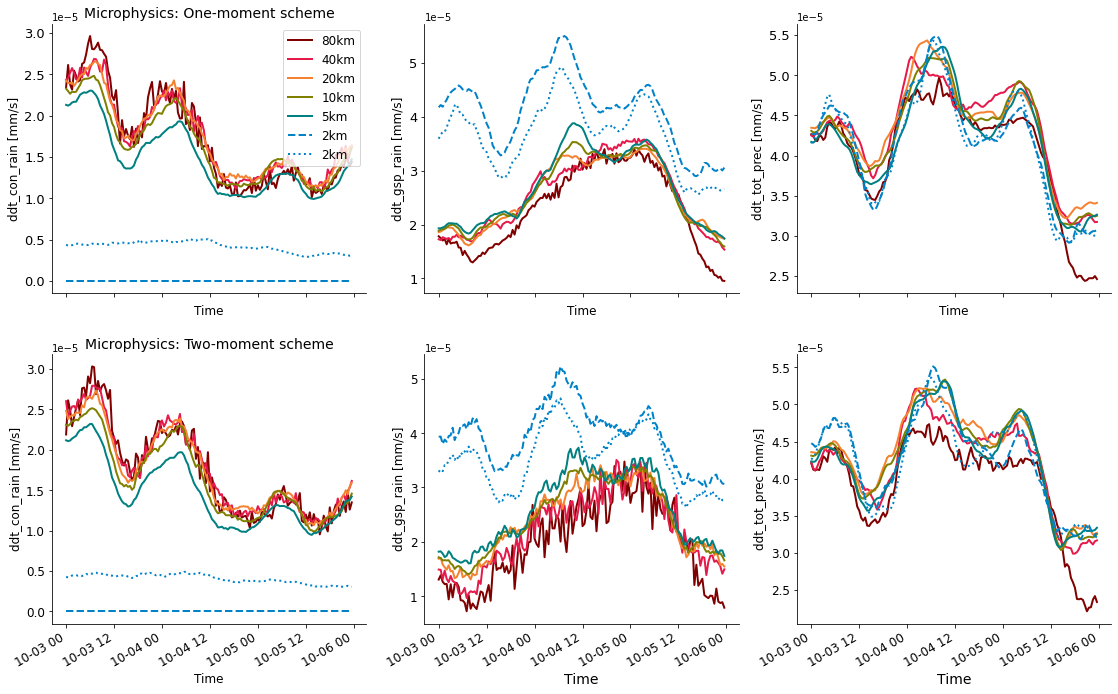

In [82]:
i = 0

fig=plt.figure(figsize=(16,10)) #18,12
ax = fig

for var in ['rain_con_rate','rain_gsp_rate','ddt_prec']:
    
    i = i + 1
    
    plot_thmean2(sim_set_1, var,i)
    
    plt.savefig('rain2.pdf', bbox_inches = 'tight')

## different simulation period

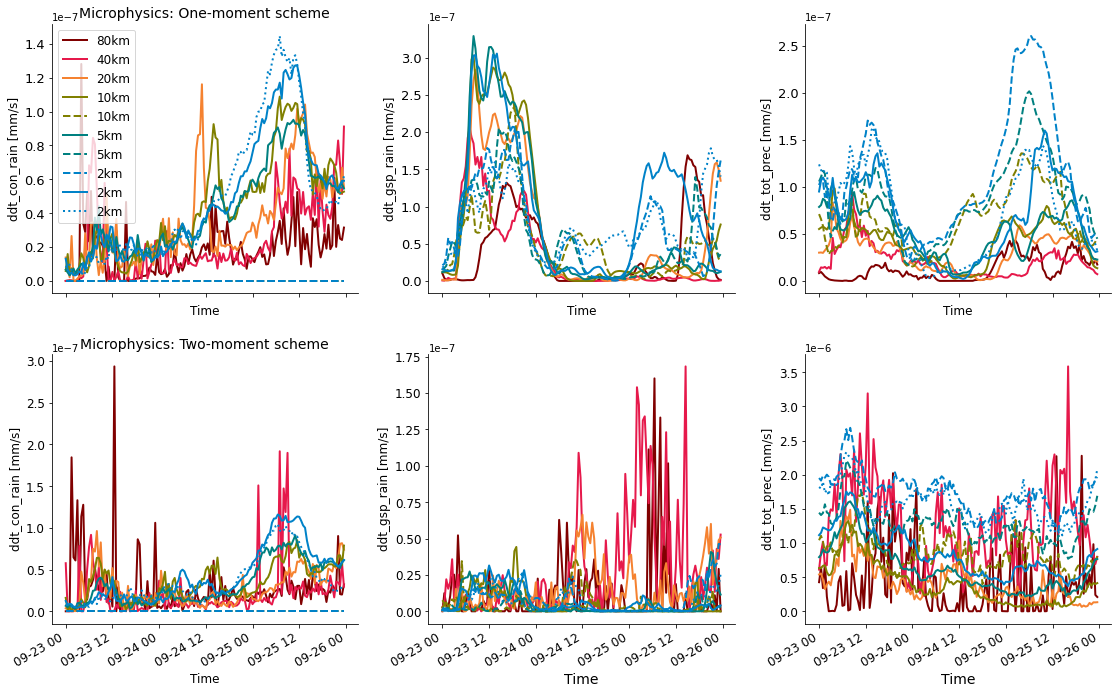

In [77]:
i = 0

fig=plt.figure(figsize=(16,10)) #18,12
ax = fig

for var in ['snow_con_rate','snow_gsp_rate','graupel_gsp_rate']:
    
    i = i + 1
    
    plot_thmean2(sim_set_1, var,i)
    
    #plt.savefig('hack2', bbox_inches = 'tight', dpi=600)